In [1]:
# Keras

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Conv2D, Dropout, Flatten, MaxPooling2D, AveragePooling2D
from keras import backend as K
from keras import optimizers
from keras import regularizers
from keras.models import load_model

# Other dependencies
import numpy as np
import matplotlib.pyplot as plt
from net_utils import plot_result, load_data_list, visLayer
from preprocess import preprocessX, rgb2gray, crop

import glob
from keras.preprocessing import image

Using TensorFlow backend.


Dectecting IPython...
Matplotlib is configured to use  module://ipykernel.pylab.backend_inline


In [2]:
#model = load_model('Model_second.h5')
model = load_model('Model_test.h5')

In [3]:
# -- add the path to your pictures 

pathToImages = 'yourPath'

image_list = []
for filename in glob.glob(pathToImages+'*.bmp'): #assuming gif
    img = image.load_img(filename)
    img = image.img_to_array(img)
    img = crop(img)
    image_list.append(img)
    
imgs = np.array(image_list)

In [4]:
imgs -= [143.44867, 115.52164, 50.996243]
imgs /= [72.799927, 59.902088, 28.172392]

predicts = model.predict_on_batch(imgs)

predicts *= [470, 400]

imgs *= [72.799927, 59.902088, 28.172392]
imgs += [143.44867, 115.52164, 50.996243]

(<matplotlib.figure.Figure at 0x7efc3c98df98>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7efc3c9f3a20>)

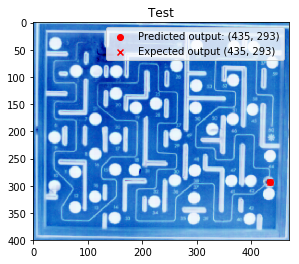

In [6]:
# -- Choose a picture from your folder

sample = 1

plot_result(imgs[sample,:,:,:], predicts[sample], predicts[sample], title="Test")